
# Project: Investigate a Dataset- TMDb movie data


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

### Dataset Description 

> **overview**:This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>**columns** : this dataset contains 21 columns and 10866
> id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres ,    production_companies,release_date,vote_count,vote_average,release_year,budget_adj and revenue_adj.

<br>

### Question(s) for Analysis


>**Question 1**: How is budget data distributed?

>**Question 2**: Do movies with high popularity have more revenues?

> **Question 3**:What are the top 20 most pouplar movies?


> **Question 4**:What are the top 20 movies with the highest revenue?

> **Question 5**:What are the top 20 most popular genres?

> **Question 6**:Which words occur the most in the title of movies?

> **Question 7**:Which words occur the most in movie overviews?

In [1]:
## IMPORTING ALL THE NEEDED LIBRARIES


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from wordcloud import WordCloud,STOPWORDS

In [2]:
def label(x,y,t):
    """
    Args:
    x (str): x-axis
    y (str): y-axis
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

<a id='wrangling'></a>
# Data Wrangling


In [3]:
## LOADING THE DATASET INTO A PANDAS DATAFRAME
original_tmdb_movies=pd.read_csv('tmdb-movies.csv')

#### The info() function allows us to get a basic look at the dataset

In [4]:
original_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### The shape method allows us to know the number of columns and rows

In [5]:
original_tmdb_movies.shape

(10866, 21)

#### We use the head() function to view the first 20 rows of the dataset .




 **NB**: You can view any number of rows you want.


In [6]:
original_tmdb_movies.head(20)

id    imdb_id  popularity     budget     revenue  \
0   135397  tt0369610   32.985763  150000000  1513528810   
1    76341  tt1392190   28.419936  150000000   378436354   
2   262500  tt2908446   13.112507  110000000   295238201   
3   140607  tt2488496   11.173104  200000000  2068178225   
4   168259  tt2820852    9.335014  190000000  1506249360   
5   281957  tt1663202    9.110700  135000000   532950503   
6    87101  tt1340138    8.654359  155000000   440603537   
7   286217  tt3659388    7.667400  108000000   595380321   
8   211672  tt2293640    7.404165   74000000  1156730962   
9   150540  tt2096673    6.326804  175000000   853708609   
10  206647  tt2379713    6.200282  245000000   880674609   
11   76757  tt1617661    6.189369  176000003   183987723   
12  264660  tt0470752    6.118847   15000000    36869414   
13  257344  tt2120120    5.984995   88000000   243637091   
14   99861  tt2395427    5.944927  280000000  1405035767   
15  273248  tt3460252    5.898400   44000000   155760117   
16  260346  tt2446042    5.749758   48000000   325771424   
17  102899  tt0478970    5.573184  130000000   518602163   
18  150689  tt1661199    5.556818   95000000   542351353   
19  131634  tt1951266    5.476958  160000000   650523427   

                           original_title  \
0                          Jurassic World   
1                      Mad Max: Fury Road   
2                               Insurgent   
3            Star Wars: The Force Awakens   
4                               Furious 7   
5                            The Revenant   
6                      Terminator Genisys   
7                             The Martian   
8                                 Minions   
9                              Inside Out   
10                                Spectre   
11                      Jupiter Ascending   
12                             Ex Machina   
13                                 Pixels   
14                Avengers: Age of Ultron   
15                      The Hateful Eight   
16                                Taken 3   
17                                Ant-Man   
18                             Cinderella   
19  The Hunger Games: Mockingjay - Part 2   

                                                 cast  \
0   Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2   Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3   Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4   Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
5   Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...   
6   Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   
7   Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...   
8   Sandra Bullock|Jon Hamm|Michael Keaton|Allison...   
9   Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...   
10  Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...   
11  Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...   
12  Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...   
13  Adam Sandler|Michelle Monaghan|Peter Dinklage|...   
14  Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...   
15  Samuel L. Jackson|Kurt Russell|Jennifer Jason ...   
16  Liam Neeson|Forest Whitaker|Maggie Grace|Famke...   
17  Paul Rudd|Michael Douglas|Evangeline Lilly|Cor...   
18  Lily James|Cate Blanchett|Richard Madden|Helen...   
19  Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...   

                                             homepage  \
0                       http://www.jurassicworld.com/   
1                         http://www.madmaxmovie.com/   
2      http://www.thedivergentseries.movie/#insurgent   
3   http://www.starwars.com/films/star-wars-episod...   
4                            http://www.furious7.com/   
5        http://www.foxmovies.com/movies/the-revenant   
6                     http://www.terminatormovie.com/   
7         http://www.foxmovies.com/movies/the-martian   
8                        http://www.minionsmovie.com/   
9                 http://movies.d

#### We use describe() to get a summary of all the columns in the dataset.
you can see various summary statistics like **count**,**mean**,**std** and a lot more

In [7]:
original_tmdb_movies.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

## Data Cleaning

#### The first thing we will do is check for duplicate values in the dataset and then subsequently drop them

In [8]:
original_tmdb_movies.duplicated().sum()

1

#### We have one duplicate value so we will drop it 

In [9]:
original_tmdb_movies.drop_duplicates()

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                  ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                                                homepage            director  \
0                          http://www.jurassicworld.com/     Colin Trevorrow   
1                            http://www.madmaxmovie.com/       George Miller   
2         http://www.thedivergentseries.movie/#insurgent    Robert Schwentke   
3      http://www.starwars.com/films/star-wars-episod...         J.J. Abrams   
4                               http://www.furious7.com/           James Wan   
...                                                  ...                 ...   
10861                                                NaN         Bruce Brown   
10862                                                NaN  John Frankenheimer   
10863                                                NaN      Eldar Ryazanov   
10864                                                NaN         Woody Allen   
10865                                                NaN    Harold P. Warren   

                                                 tagline  ...  \
0                                      The park is open.  ...   
1                                     What a Lovely Day.  ...   
2                             One Choice Can Destroy You  ...   
3                          Every generation has a story.  ...   
4                                    Vengeance Hits Home  ...   
...                                                  ...  ...   
10861                                                NaN  ...   
10862  Cinerama sweeps YOU into a drama of speed and ...  ...   
10863                                                NaN  ...   
10864                          WOODY ALLEN STRIKES BACK!  ...   
10865       It's Shocking! It's Beyond Your Imagination!  ...   

                                                overview runtime  \
0      Twenty-two years after the events of Jurassic ...     124   
1      An apocalyptic story set in the furthest reach...     120   
2      Beatrice Prior must confront her inner demons ...     119   
3      Thirty years after defeating the Galactic E

#### Next thing in the data cleaning process is **Taking** care of Nan values.
#### **Nan** means _Not a number_

In [10]:
# Checking the sum of null values for each column
original_tmdb_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### There is an Art to Cleaning Values
> The dataset has 10866 rows and 21 columns so we will :

> 1.Drop any column whose Nan values are more than _15%_ of the total number of rows

> 2.Replace the Nan values of a column with zero if the null values are less than 15% of the total number of rows






#### Columns 7,9,10 and 14 have Null values that are more than 15% so we will drop those columns

In [11]:
original_tmdb_movies.drop(original_tmdb_movies.columns[[7, 9, 10,14]], axis=1, inplace=True)

#### Now that we have dropped column 7,9,10 and 14 ...let's proceed to deal with the rest of the Nan values

In [12]:

original_tmdb_movies.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

##### Since the number of Nan values has reduced significantly, we are going to replace all the Nan values left with zero(0) in order not to lose valuable data

In [13]:
original_tmdb_movies.fillna(0)

id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast            director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...     Colin Trevorrow   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...       George Miller   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...    Robert Schwentke   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...         J.J. Abrams   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...           James Wan   
...                                                  ...                 ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...         Bruce Brown   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...  John Frankenheimer   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      Eldar Ryazanov   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...         Woody Allen   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...    Harold P. Warren   

                                                overview  runtime  \
0      Twenty-two years after the events of Jurassic ...      124   
1      An apocalyptic story set in the furthest reach...      120   
2      Beatrice Prior must confront her inner demons ...      119   
3      Thirty years after defeating the Galactic Empi...      136   
4      Deckard Shaw seeks revenge against Dominic Tor...      137   
...                                                  ...      ...   
10861  The Endless Summer, by Bruce Brown, is one of ...       95   
10862  Grand Prix driver Pete Aron is fired by his te...      176   
10863  An insurance agent who moonlights as a carthie...       94   
10864  In comic Woody Allen's film debut, he took the...       80   
10865  A family gets lost on the road and stumbles up...       74   

                                          genres release_date  vote_count  \
0      Action|Adventure|Science Fiction|Thriller       6/9/15        5562   
1      Action|Adventure|Science Fiction|Thriller      5/13/15        6185   
2             Adventure|Science Fiction|Thriller      3/18/15        2480   
3       Action|Adventure|Science Fiction|Fantasy     12/15/15        5292   
4                          Action|Crime|Thriller       4/1/15        2947   
...                                          ...          ...         ...   
10861                                Documentary      6/15/66          11   
10862                     Action|Adventure|Drama     12/21/66          20   
10863                             Mystery|Comedy       1/1/66          11   
10864                              Action|Comedy      11/2/66          22   
10865                                     Horror     11/15/66          15   

       vote_average  release_year    budget_adj   revenue_adj  
0     

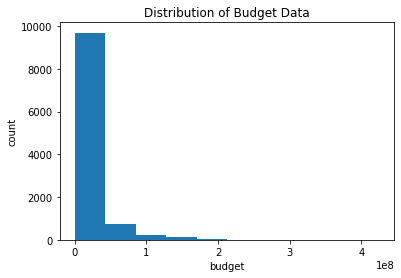

In [14]:

plt.hist(data=original_tmdb_movies, x="budget")
label('budget','count','Distribution of Budget Data');

#### From this graph we can see that majority of the data points falls between 0 and 1.This shows that the budget column is skewed to the left

<a id='eda'></a>
# Exploratory Data Analysis

# RESEARCH QUESTION 1:Do movies with high popularity have more revenues?

#### In order to make our exploration easier let's get a heatmap that shows the correlation between the various columns.
##### This will allow us to determine the strength of the relationship between various columns or if there is no relationship at all.

>**NB** The following shows the signficance of various values.

>-1.0 to -0.5 or 1.0 to 0.5	Strong

>0.5 to -0.3 or 0.3 to 0.5	Moderate

>-0.3 to -0.1 or 0.1 to 0.3	Weak

>-0.1 to 0.1	None or very weak

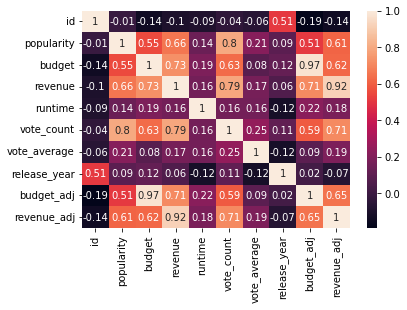

<Figure size 1008x1008 with 0 Axes>

In [15]:

correlation_all = original_tmdb_movies.corr().round(2)
sns.heatmap(correlation_all, annot=True)
fig = plt.figure()
fig.set_size_inches(14, 14)
plt.show()

#### _The next thing we would do is find the correlation between popularity and revenue_

In [16]:
# FINDING THE CORRELATION BETWEEN POPULARITY AND REVENUE
correlation = original_tmdb_movies["popularity"].corr(original_tmdb_movies["revenue"])
print(correlation)


0.6633583664517382


##### The correlation coefficient between popularity and revenue is 0.66 .This implies that there is a strong relationship between these two columns
### **Let's visualize this relationship and see**

#### In order to make it easier to visualize the popularity column ,we will round it the nearest significant figure

In [17]:
original_tmdb_movies['popularity'].round()

0        33.0
1        28.0
2        13.0
3        11.0
4         9.0
         ... 
10861     0.0
10862     0.0
10863     0.0
10864     0.0
10865     0.0
Name: popularity, Length: 10866, dtype: float64

#### Let's visualize the relationship between popularity and revenue

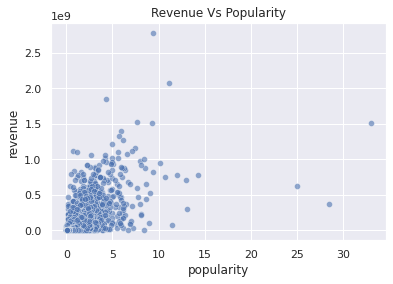

In [18]:
sns.set()
sns.scatterplot(y='revenue',x='popularity',data=original_tmdb_movies,alpha=0.6)
label('popularity','revenue','Revenue Vs Popularity');
sns.set(rc={"figure.figsize":(18,10),})

#### From the graph ,it can be seen that whilst movies with low popularity have lower revenues ,the opposite can't be said for movies with high popularity.

#### The graph shows that some movies with high popularity have high revenues whilst others have low revenues.



# RESEARCH QUESTION 2: What are the top 20 most popular movies?




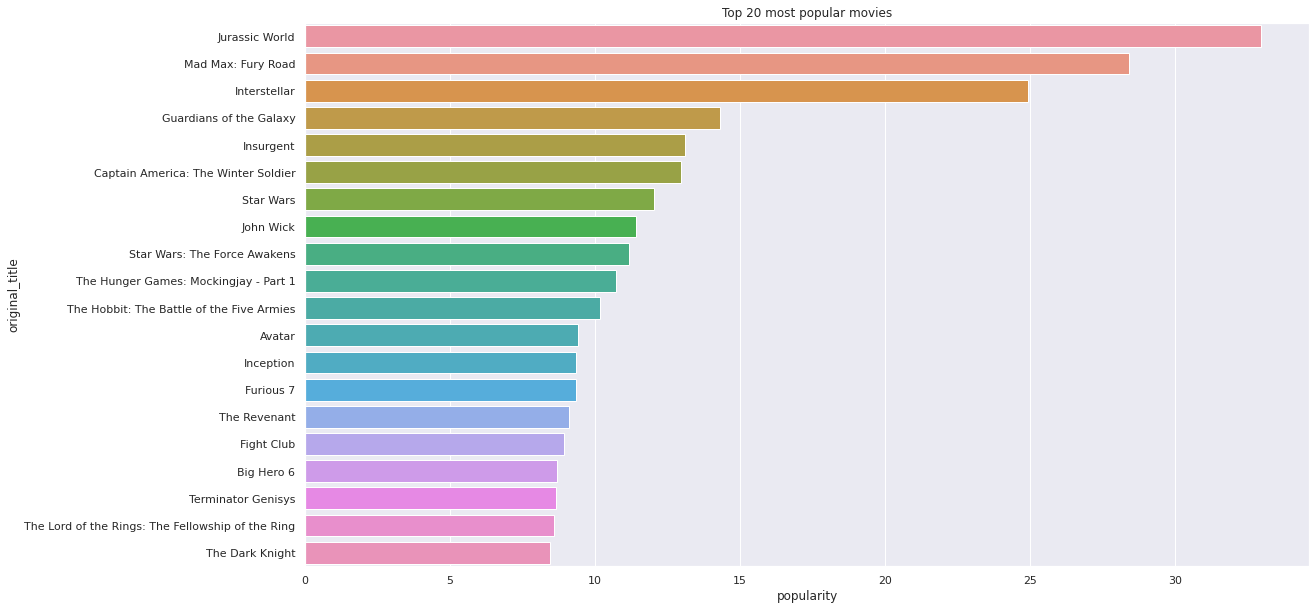

In [19]:
# Creating a new dataframe,'most_popular_movies' from the original dataframe and sorting it in descending order(highest to lowest)
most_popular_movies = pd.DataFrame(original_tmdb_movies['popularity'].sort_values(ascending = False))
most_popular_movies['original_title'] = original_tmdb_movies['original_title']
data = list(map(str,(most_popular_movies['original_title'])))


x = list(data[:20])
y = list(most_popular_movies['popularity'][:20])

#plotting the figure and setup the title and labels.
popularity_vs_movie = sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,7)})
label('popularity','original_title','Top 20 most popular movies');
sns.set_style("darkgrid")


## Research Question 3: WHAT ARE THE TOP MOVIES WITH THE HIGHEST REVENUE?

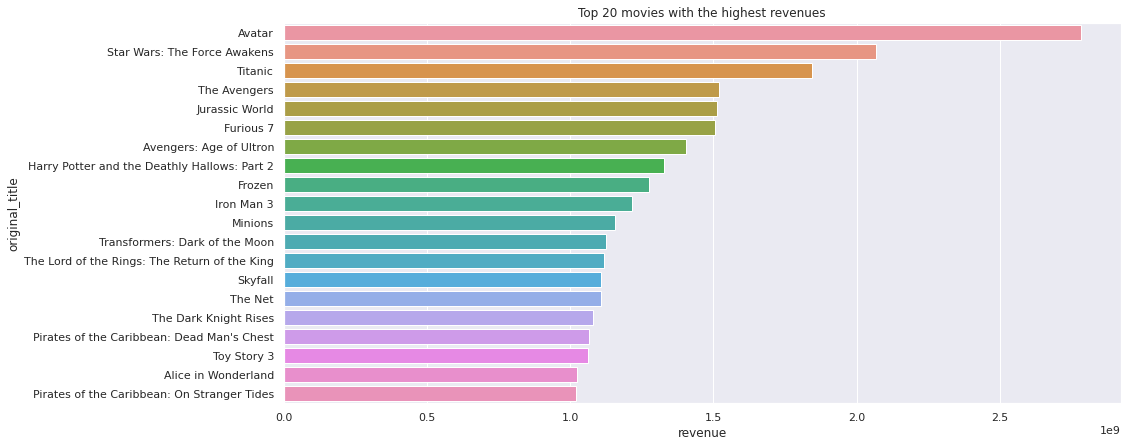

In [20]:
# Creating a new dataframe,'highest_earning_movies' from the original dataframe and sorting it in descending order(highest to lowest)
highest_earning_movies = pd.DataFrame(original_tmdb_movies['revenue'].sort_values(ascending = False))
highest_earning_movies['original_title'] = original_tmdb_movies['original_title']
data = list(map(str,(highest_earning_movies['original_title'])))


x = list(data[:20])
y = list(highest_earning_movies['revenue'][:20])

#plotting the figure and setup the title and labels.
revenue_movie= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,7)})
label('revenue','original_title','Top 20 movies with the highest revenues');
sns.set_style("darkgrid")



#### From the bar graph ,we can see that **Avatar** is the highest earning movie followed by **Star Wars:The Force Awakens**,**the Avengers** and so on.

# RESEARCH QUESTION 4: WHAT ARE  THE TOP 20 MOST POPULAR GENRES?

#### Let's try to visualize the answer to this question with a bargraph

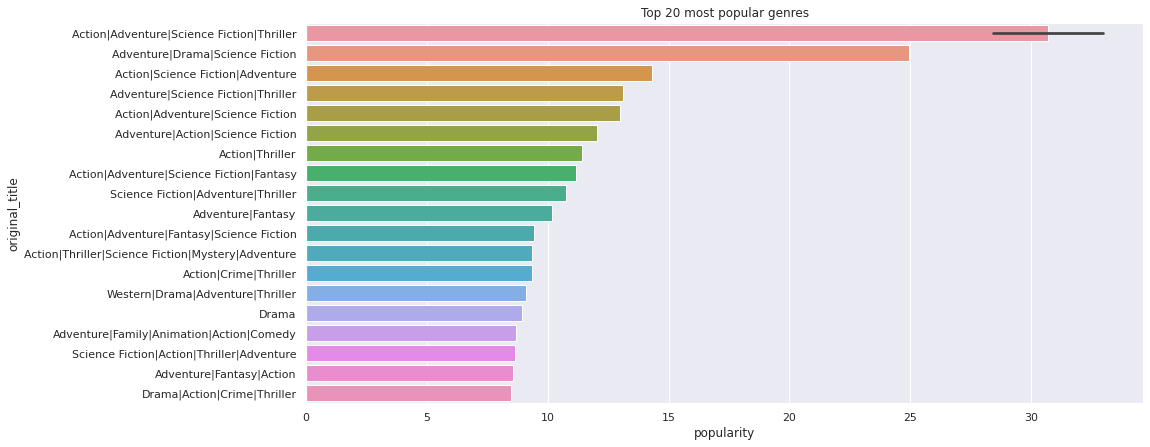

In [21]:
# Creating a new dataframe 'most_popular_genre' from the original dataframe and sorting it in descending order(highest to lowest)
most_popular_genre = pd.DataFrame(original_tmdb_movies['popularity'].sort_values(ascending = False))
most_popular_genre['genres'] = original_tmdb_movies['genres']
data = list(map(str,(most_popular_genre['genres'])))


x = list(data[:20])
y = list(most_popular_genre['popularity'][:20])

#plotting the figure and setup the title and labels.
popularity_genre= sns.barplot(x=y,y=x)
sns.set(rc={'figure.figsize':(15,7)})
label('popularity','original_title','Top 20 most popular genres');
sns.set_style("darkgrid")

#### From this bar graph we can see that movies that are categorized as **Action/Adventure/Science Fiction/Thriller** have the highest popularity

# RESEARCH QUESTION 5 : WHAT WORDS ARE MOST POPULAR IN THE TITLE OF MOVIES?

#### The most appropriate visualization to answer this question is a Word Cloud

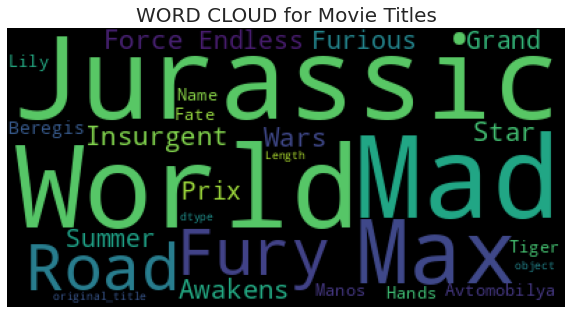

In [22]:
#Plotting the word cloud
plt.figure(figsize = (10,10))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords=stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(original_tmdb_movies['original_title']))

#Plotting the word cloud
plt.imshow(wordcloud)
plt.title("WORD CLOUD for Movie Titles", fontsize = 20)
plt.axis('off')
plt.show()


#### The word cloud shows that words like **Jurassic**,**World**,**Fury**,**Mad** occur frequently in the title of movies.

# RESEARCH QUESTION 5 : WHAT WORDS OCCUR THE MOST IN MOVIE OVERVIEWS ?

#### Let's visualize the answer to this question with a word cloud

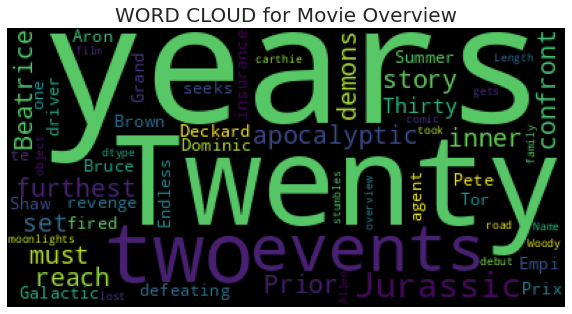

In [23]:
#Plotting the word cloud
plt.figure(figsize = (10,10))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords=stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(original_tmdb_movies['overview']))

#Plotting the word cloud
plt.imshow(wordcloud)
plt.title("WORD CLOUD for Movie Overview", fontsize = 20)
plt.axis('off')
plt.show()

#### This Word Cloud shows that words like **years**,**Twenty**,**two**,**events** occur the most in movie overviews. 

<a id='conclusions'></a>

# CONCLUSION

## Analysis Shortcoming & Data Limitations


                                                                              

1. Columns like homepage,tagline,keywords and production_companies had a lot of Nan values and had to be dropped even though they could yielded a lot of  useful insights

2. The budget_adj and revenue_adj columns seemed very interesting but I did not have the expertise to understand what they represented.
<br>


>**Question 1**: How is budget data distributed?

>**Answer** : The histogram shows that budget data is skewed to the left
<br>
>**Question 2**: Do movies with high popularity have more revenues?

>**Answer** : Not necessarily.The analysis showed that movies with low popularity have less revenue but movies with high popularity can sometimes have high revenues or low revenues.

> **Question 3**:What are the top 20 most popular movies?

>**Answer** : From the dataset ,we see that the top 20 most popular movies  > are Jurassic World ,Mad Max:Fury Road,Interstellar,Guardians of the Galaxy just to mention a few


> **Question 4**:What are the top 20 movies with the highest revenue?

>**Answer** :  The highest earning movies are Avatar ,Starwars:The force Awakens just to mention a few.

> **Question 5**:What are the top 20 most popular genres?

>**Answer** : The most popular genres are Action/Adventure/Science Fiction/Thriller followed by Adventure/Drama/Science Fiction and Action/Science Fiction/Adventure just to mention a few

> **Question 6**:WHich words occur the most in the title of movies?

>**Answer**: The most popular words in the title of movies are **Jurassic**,**World**, **Fury**, **Mad** occur frequently in the title of movies.

> **Question 7**:WHich words occur the most in movie overviews?

>**Answer**: The most popular words in movie overviews are **years**,**Twenty**,**two**,**events**



# REFERENCES


1.   https://blog.nycdatascience.com/student-works/machine-learning/     movie-rating-prediction
2.  https://github.com/hima888/Investigate-a-Dataset-TMDB-Movie-Data-/blob/master/investigate-a-dataset-template.ipynb

3. https://www.adamsmith.haus/python/answers/how-to-find-the-correlation-between-two-pandas-dataframe-columns-in-python

4. https://plotly.com/python/plotly-express/#scatter-line-area-and-bar-charts
5. https://pythonguides.com/matplotlib-increase-plot-size/#:~:text=Next%2C%20to%20increase%20the%20size,and%20height%20of%20the%20plot.

6. https://machinelearningmastery.com/handle-missing-data-python/

7. https://datagy.io/python-correlation-matrix/
8. https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
9. https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python

10. https://stackoverflow.com/questions/15221473/how-do-i-update-upgrade-pip-itself-from-inside-my-virtual-environment




